In [1]:
import os
from keras import preprocessing, layers, models, optimizers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
FAST_RUN = False

data_path = '../data/kaggle_dogcat/'

#cats pictures
path_cats = []
train_cats = data_path + 'train/cats'
for path in os.listdir(train_cats):
    if '.jpg' in path:
        path_cats.append(os.path.join(train_cats, path))

#dogs pictures
path_dogs = []
train_dogs = data_path + "train/dogs"
for path in os.listdir(train_dogs):
    if '.jpg' in path:
        path_dogs.append(os.path.join(train_dogs, path))

len(path_cats), len(path_dogs)

(2000, 2000)

In [3]:
#Test Data
path_test = []
test_data = data_path + 'test'
for path in os.listdir(test_data):
    if '.jpg' in path:
        path_test.append(os.path.join(test_data, path))

len(path_test)


400

In [4]:
# load training set
training_set = np.zeros((3200, 150, 150, 3), dtype='float32')
for i in range(3200):
    if i < 1600:
        path = path_dogs[i]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_cats[i - 1600]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)

In [5]:
training_set.shape

(3200, 150, 150, 3)

In [6]:
validation_set = np.zeros((800, 150, 150, 3), dtype='float32')
for i in range(800):
    if i < 400:
        path = path_dogs[i + 1600]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_cats[i + 800]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)

In [7]:
validation_set.shape

(800, 150, 150, 3)

In [8]:
#build model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [ ]:
train_labels = np.zeros((1600,))
train_labels = np.concatenate((train_labels, np.ones((1600,))))
validation_labels = np.zeros((400,))
validation_labels = np.concatenate((validation_labels, np.ones((400,))))

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32)
validation_generator = train_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 3 if FAST_RUN else 30,
    validation_steps=50,
    validation_data=validation_generator,
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6794 - acc: 0.5669 - val_loss: 0.6712 - val_acc: 0.5413
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6440 - acc: 0.6250 - val_loss: 0.6102 - val_acc: 0.6787
Epoch 3/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6032 - acc: 0.6709 - val_loss: 0.6164 - val_acc: 0.6525
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5659 - acc: 0.7044 - val_loss: 0.5408 - val_acc: 0.7400
Epoch 5/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5369 - acc: 0.7247 - val_loss: 0.5196 - val_acc: 0.7650
Epoch 6/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5148 - acc: 0.7500 - val_loss: 0.5184 - val_acc: 0.7475
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 0.4850 - acc: 0.7638 - val_loss: 0.5315 - val_acc: 0.7338
Epoch 8/30
100/100 

In [ ]:
model.save('cats_and_dogs_small_1.h5')

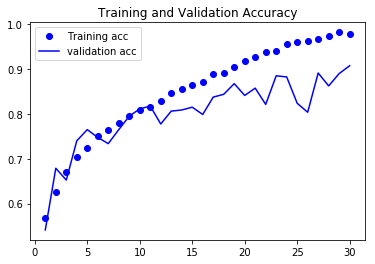

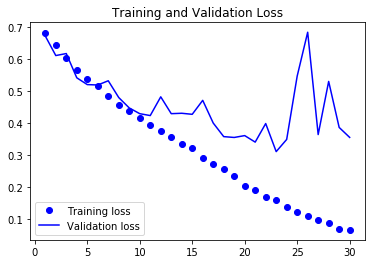

In [ ]:
#plot error curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
#fix overfitting
datagen = preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

<Figure size 432x288 with 0 Axes>

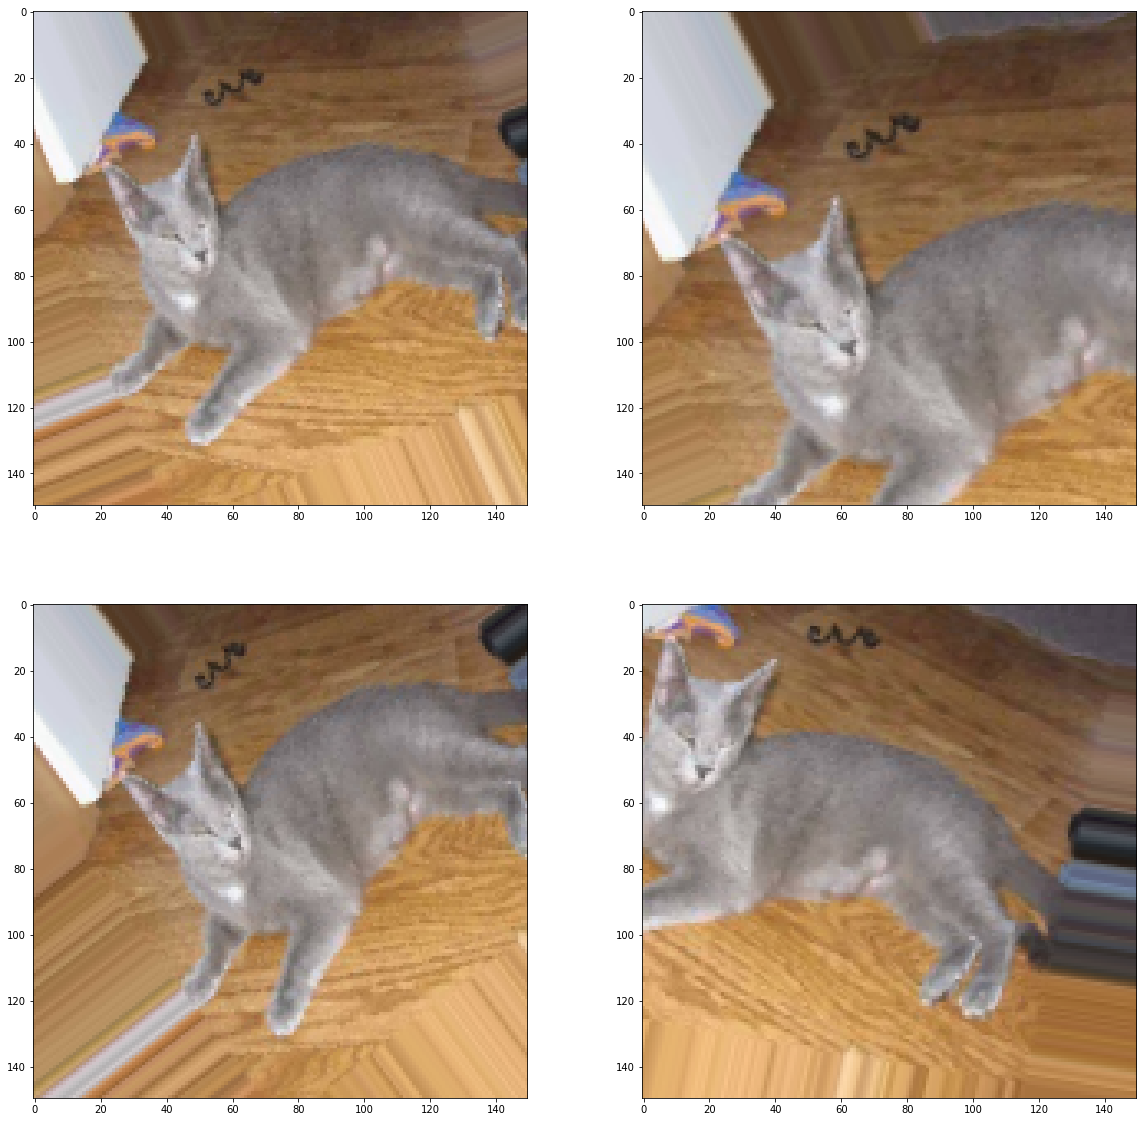

In [ ]:
#visualize data
plt.clf()

fnames = [os.path.join(train_cats, fname) for fname in os.listdir(train_cats)]
img_path = fnames[3]
img = preprocessing.image.load_img(img_path, target_size=(150, 150))
x = preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.figure(figsize=(20, 20))

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    plt.imshow(preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
#model building

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
  )
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32
  )

test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [ ]:
#train
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/200
100/100 [==============================] - 25s 250ms/step - loss: 0.8128 - acc: 0.5909 - val_loss: 0.6641 - val_acc: 0.6637
Epoch 2/200
100/100 [==============================] - 22s 218ms/step - loss: 0.7608 - acc: 0.6188 - val_loss: 0.7664 - val_acc: 0.6450
Epoch 3/200
100/100 [==============================] - 21s 206ms/step - loss: 0.7690 - acc: 0.6287 - val_loss: 0.6372 - val_acc: 0.6800
Epoch 4/200
100/100 [==============================] - 18s 184ms/step - loss: 0.7335 - acc: 0.6384 - val_loss: 0.7823 - val_acc: 0.6288
Epoch 5/200
100/100 [==============================] - 18s 183ms/step - loss: 0.6892 - acc: 0.6694 - val_loss: 0.7666 - val_acc: 0.6475
Epoch 6/200
100/100 [==============================] - 18s 185ms/step - loss: 0.6722 - acc: 0.6734 - val_loss: 0.5745 - val_acc: 0.7262
Epoch 7/200
100/100 [==============================] - 19s 186ms/step - loss: 0.6556 - acc: 0.6709 - val_loss: 0.6388 - val_acc: 0.6763
Epoch 8/200
100/100 [===========================

Epoch 61/200
100/100 [==============================] - 19s 193ms/step - loss: 0.3783 - acc: 0.8234 - val_loss: 0.4460 - val_acc: 0.8000
Epoch 62/200
100/100 [==============================] - 19s 193ms/step - loss: 0.3811 - acc: 0.8191 - val_loss: 0.3922 - val_acc: 0.8163
Epoch 63/200
100/100 [==============================] - 22s 222ms/step - loss: 0.3654 - acc: 0.8328 - val_loss: 0.4442 - val_acc: 0.8063
Epoch 64/200
100/100 [==============================] - 19s 188ms/step - loss: 0.3902 - acc: 0.8241 - val_loss: 0.4006 - val_acc: 0.8250
Epoch 65/200
100/100 [==============================] - 19s 186ms/step - loss: 0.3678 - acc: 0.8356 - val_loss: 0.3661 - val_acc: 0.8363
Epoch 66/200
100/100 [==============================] - 19s 185ms/step - loss: 0.3594 - acc: 0.8363 - val_loss: 0.4402 - val_acc: 0.8237
Epoch 67/200
100/100 [==============================] - 19s 189ms/step - loss: 0.3500 - acc: 0.8347 - val_loss: 0.4603 - val_acc: 0.8087
Epoch 68/200
100/100 [===================

100/100 [==============================] - 19s 186ms/step - loss: 0.2817 - acc: 0.8756 - val_loss: 0.2667 - val_acc: 0.8912
Epoch 121/200
100/100 [==============================] - 19s 186ms/step - loss: 0.2766 - acc: 0.8791 - val_loss: 0.3942 - val_acc: 0.8325
Epoch 122/200
100/100 [==============================] - 18s 185ms/step - loss: 0.2532 - acc: 0.8888 - val_loss: 0.2345 - val_acc: 0.9062
Epoch 123/200
100/100 [==============================] - 18s 183ms/step - loss: 0.2727 - acc: 0.8828 - val_loss: 0.2583 - val_acc: 0.8988
Epoch 124/200
100/100 [==============================] - 18s 185ms/step - loss: 0.2781 - acc: 0.8809 - val_loss: 0.4130 - val_acc: 0.8200
Epoch 125/200
100/100 [==============================] - 18s 184ms/step - loss: 0.2779 - acc: 0.8772 - val_loss: 0.3305 - val_acc: 0.8538
Epoch 126/200
100/100 [==============================] - 18s 184ms/step - loss: 0.2780 - acc: 0.8838 - val_loss: 0.2959 - val_acc: 0.8688
Epoch 127/200
100/100 [=========================

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
from keras import backend as k
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
net = load_model('cats_and_dogs_small_1.h5')

cls_list = ['cats, dogs']

for f in path_test:
    img = image.load_img(f, target_size=(150, 150))
    if img is None:
        continue
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    pred = net.predict(x)[0]
    top_inds = pred.argsort()[::-1][:5]
    print(f)
    for i in top_inds:
        print('    {:.3f}  {}'.format(pred[i], cls_list[i]))

In [ ]:
net = load_model('cats_and_dogs_small_2.h5')

cls_list = ['cats, dogs']

for f in path_test:
    img = image.load_img(f, target_size=(150, 150))
    if img is None:
        continue
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    pred = net.predict(x)[0]
    top_inds = pred.argsort()[::-1][:5]
    print(f)
    for i in top_inds:
        print('    {:.3f}  {}'.format(pred[i], cls_list[i]))